# Introduction

> This is a data analysis project using Twitter data. In the following data analysis, the following questions will be answered:
> * Which one of three algorithms has higher accuracy?
> * Is there any relationship between dog states, ratings, retweet counts and favourite counts?

---

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

sns.set(style="ticks", color_codes=True)

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
data_dir = "./output"

tam_data_filepath = os.path.join(data_dir, "twitter_archive_master.csv") 

In [3]:
df_tam = pd.read_csv(tam_data_filepath, index_col=0)

In [4]:
df_tam_new = df_tam.copy()

df_tam_new["retweet_count"] = df_tam_new["retweet_count"] / 100
df_tam_new["favorite_count"] = df_tam_new["retweet_count"] / 100

In [5]:
df_tam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   1331 non-null   int64  
 1   timestamp                  1331 non-null   object 
 2   status_update              1331 non-null   object 
 3   dog_name                   1331 non-null   object 
 4   dog_state                  174 non-null    object 
 5   ratings                    1331 non-null   float64
 6   jpg_url                    1331 non-null   object 
 7   img_num                    1331 non-null   int64  
 8   prediction_1               1331 non-null   object 
 9   prediction_1_confidence    1331 non-null   float64
 10  is_prediction_1_dog_breed  1331 non-null   bool   
 11  prediction_2               1331 non-null   object 
 12  prediction_2_confidence    1331 non-null   float64
 13  is_prediction_2_dog_breed  1331 non-null   bool 

---
---

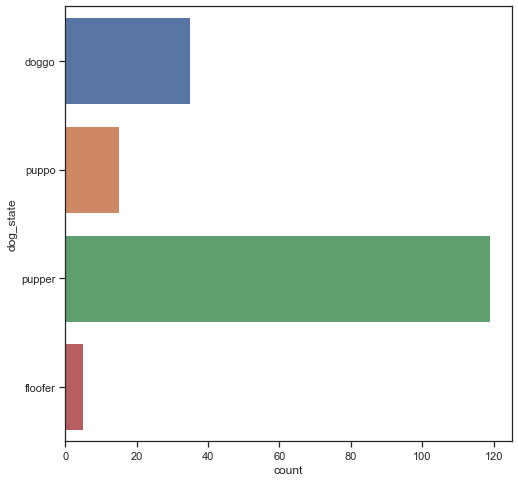

In [6]:
ax = sns.countplot(y="dog_state", data=df_tam)

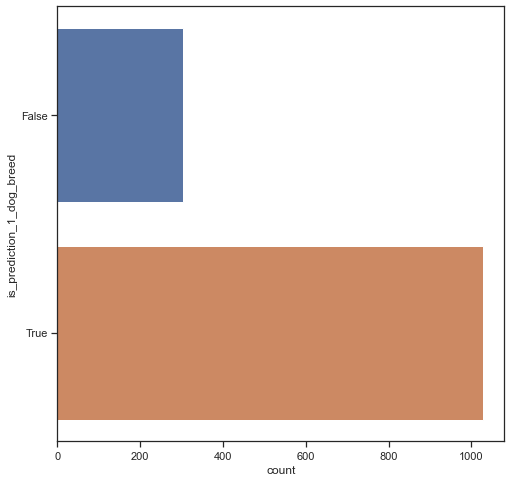

In [7]:
ax = sns.countplot(y="is_prediction_1_dog_breed", data=df_tam)

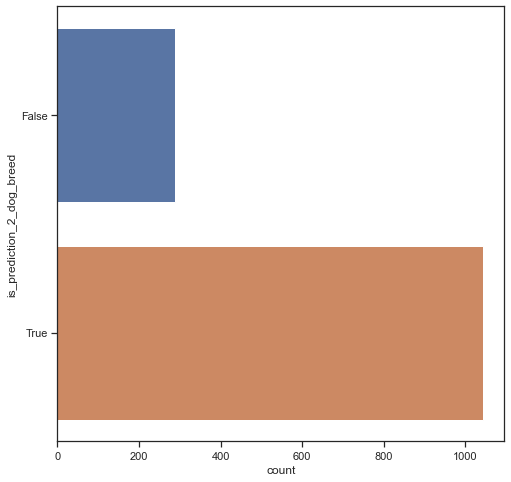

In [8]:
ax = sns.countplot(y="is_prediction_2_dog_breed", data=df_tam)

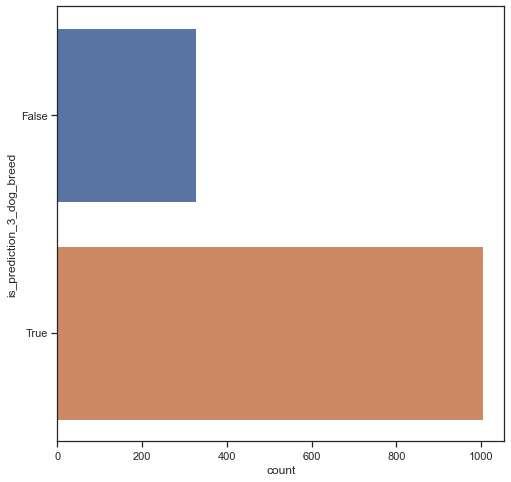

In [9]:
ax = sns.countplot(y="is_prediction_3_dog_breed", data=df_tam)

> **Summary**
> * From the above plots,
>   * Out of four dog states, the number of counts for pupper is the highest. On the other hand, floofer has the lowest count. (**bias in the data**)
>   * No matter which algorithm is used, the counts of truly predicted dog breeds are higher than the ones that are not.

---
---

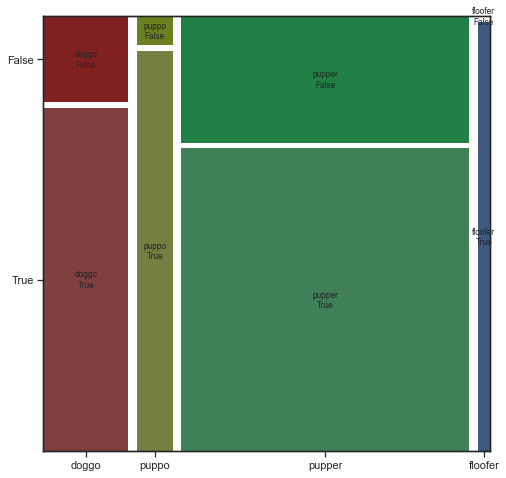

In [10]:
plt.rcParams['font.size'] = 10
mosaic(df_tam, ['dog_state', 'is_prediction_1_dog_breed'], gap=0.02);

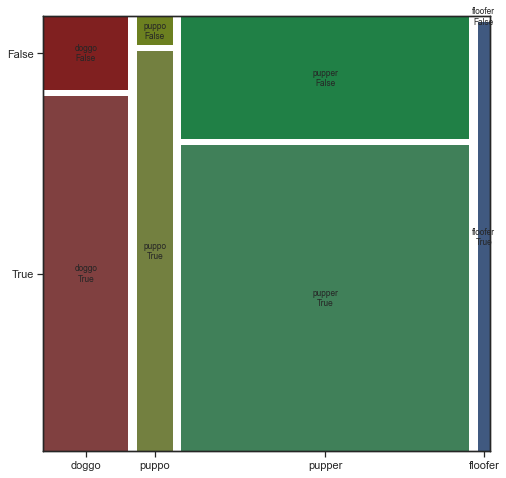

In [11]:
mosaic(df_tam, ['dog_state', 'is_prediction_2_dog_breed'], gap=0.02);

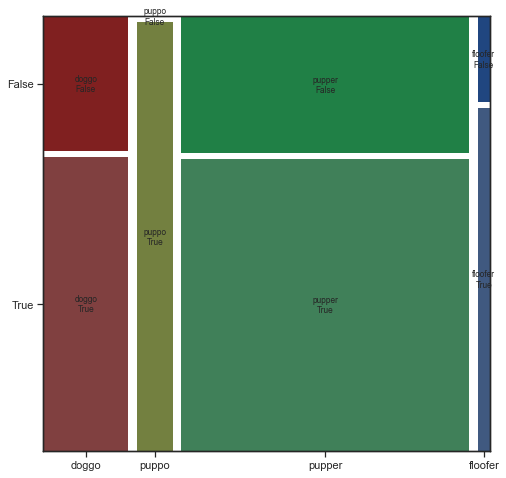

In [12]:
mosaic(df_tam, ['dog_state', 'is_prediction_3_dog_breed'], gap=0.02);

> **Summary**
> * Algorithm #1 & Algorithm #2
>   * Even though the counts of floofer is the lowest, it has the highest precision
> * Algorithm #3
>   * puppo has the highest accuracy
> * No matter which algorithm was used, the proportion of positives are different for all dog states
> * *To Conclude*
>   * We can see that there is a correlation between dog states  and predicted results.
>   * In addition, algorithms does have an impact on the predictions. 

---
---

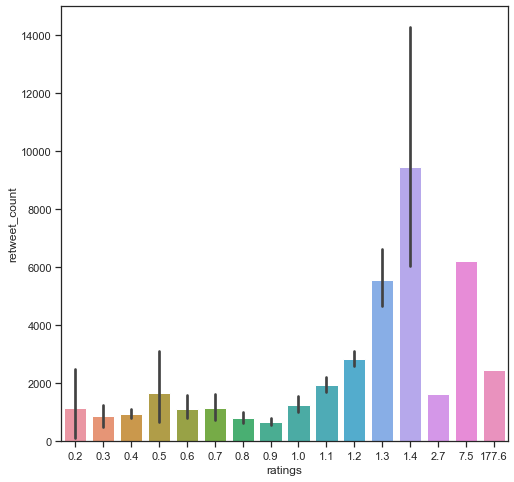

In [13]:
sns.barplot(x="ratings", y="retweet_count", data=df_tam)

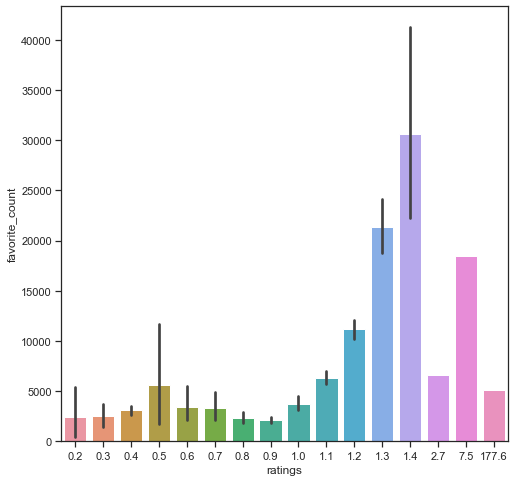

In [14]:
sns.barplot(x="ratings", y="favorite_count", data=df_tam)

> **Summary**
> * The lowest ratings is 0.2 whereas 177.6 is the highest ratings.
> * The above plots have left skewed distributions. It indicates the correlation between ratings and favorite_count as well as the correlation between ratings and retweet_count are weak.
> * For both graphs, ratings of 1.4 has the highest favorite_count and retweet_count.
> * Ratings of 1.4 has the highest variance whereas ratings of 0.9 has the lowest variance.

---
---

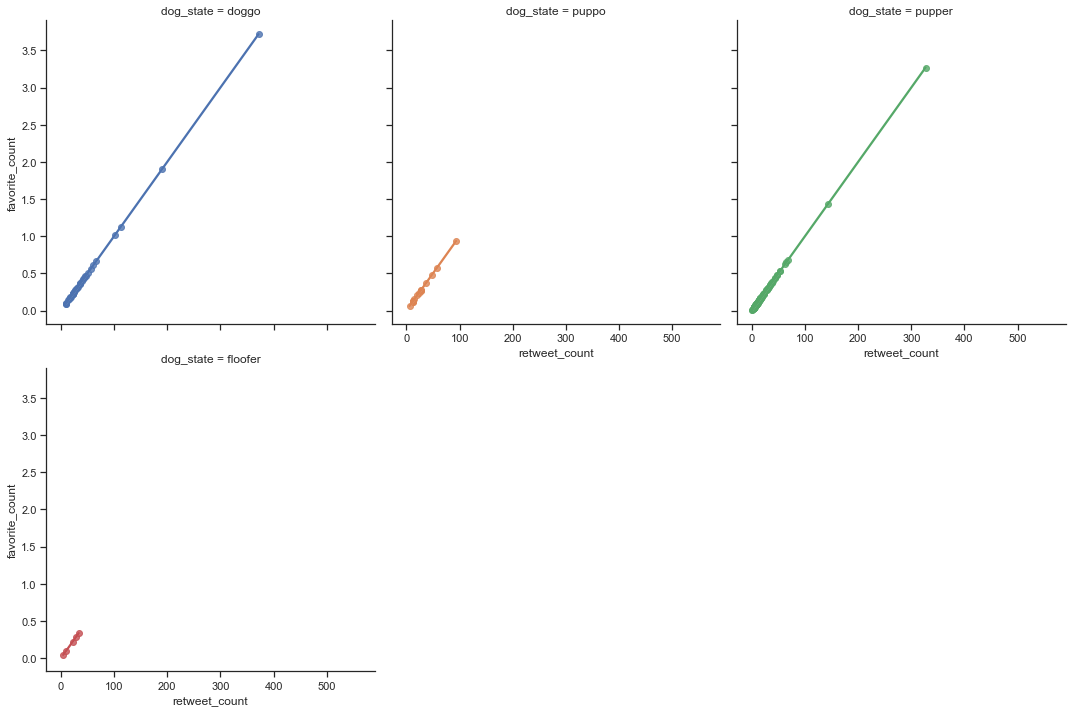

In [15]:
sns.lmplot(
    x="retweet_count", y="favorite_count", 
    hue="dog_state", col="dog_state", 
    data=df_tam_new, height=5, col_wrap=3)

> **Summary**
> * Clearly shown by the graphs having doggo, puppo and pupper as dog states, there is a strong relationship between retweet_count and favorite_count
> * It seems the relationship is weak by the "dog_state = floofer" plot. However, the counts of floofer is very low. We cannot conclude from this graph
> * Compare the degree of correlation between retweet_count and favorite_count: 
>   * pupper > puppo > doggo 

---
---
---

In [16]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

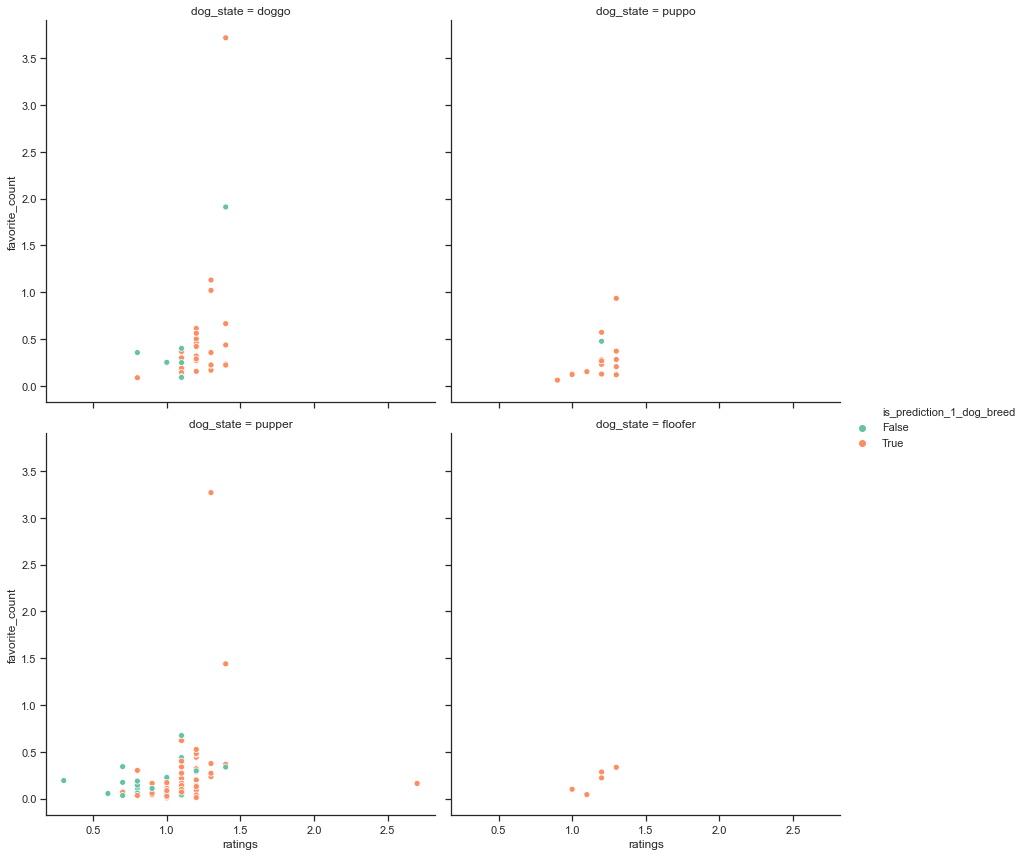

In [17]:
ax = sns.relplot(x="ratings", y="favorite_count", col="dog_state",
                     hue="is_prediction_1_dog_breed", 
                     palette="Set2", height=6, col_wrap=2, 
                     kind="scatter", data=df_tam_new)

> **Algorithm 1 & Favourite Count**
> * One of pupper has the highest ratings, and one of pupper has the highest favourite count, but neither of them is predicted as dog.
> * Most of ratings are in the range between 0.5 and 1.5. The ratings of pupper has the highest variance
> * Even though there is a "pupper" has ratings below 0.5, the prediction shows it is not a dog

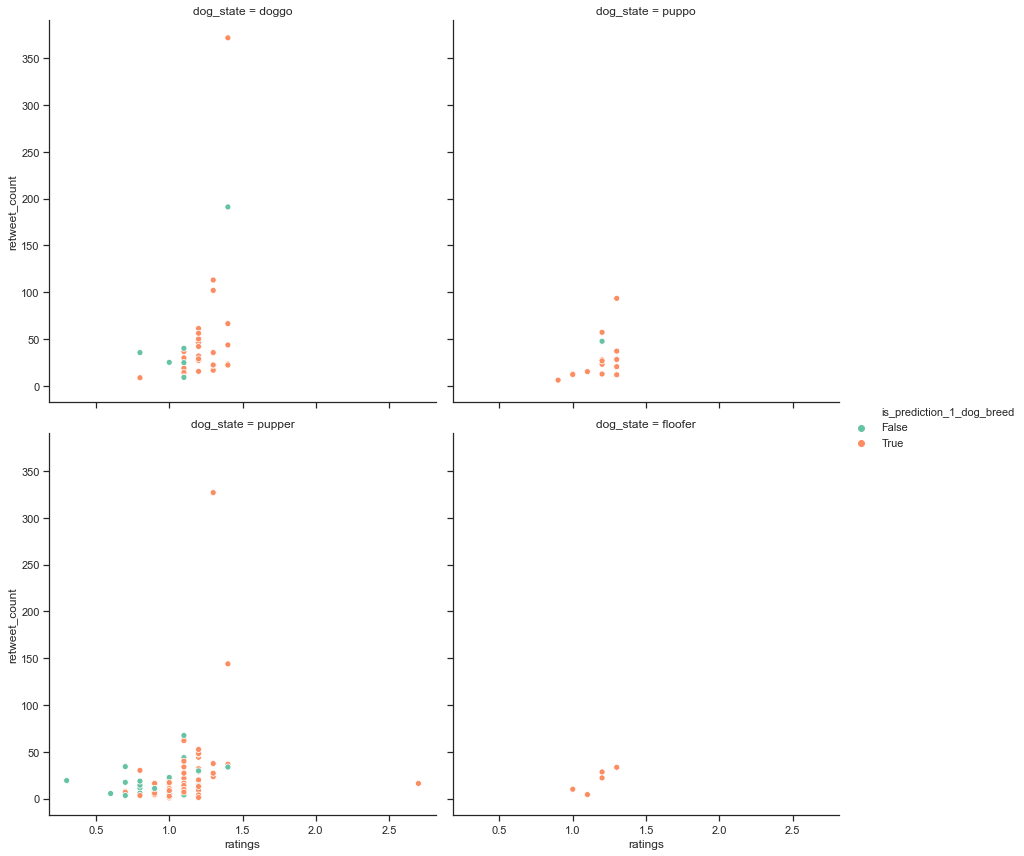

In [18]:
ax = sns.relplot(x="ratings", y="retweet_count", col="dog_state",
                     hue="is_prediction_1_dog_breed", 
                     palette="Set2", height=6, col_wrap=2, 
                     kind="scatter", data=df_tam_new)

> **Algorithm 1 & Retweet Count**
> * Algorithm 1 seems to have lowest accuracy in predicting when it is a pupper dog.
> * A doggo dog has the highest retweet count.

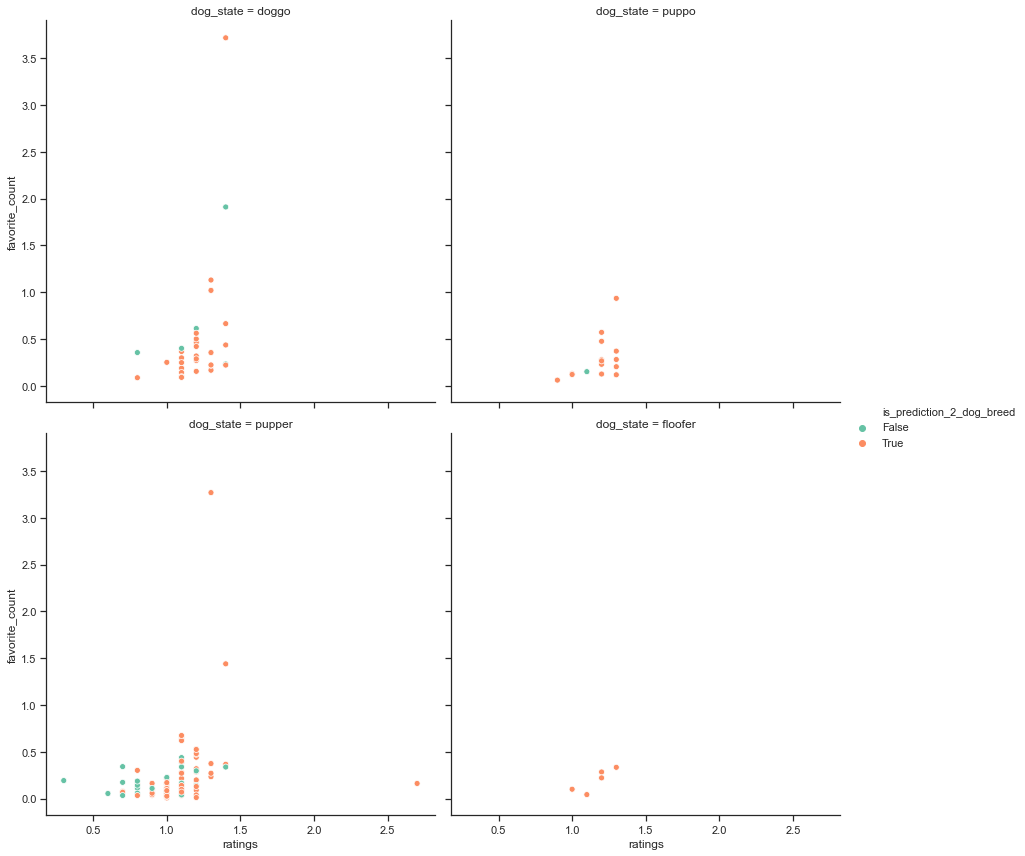

In [19]:
ax = sns.relplot(x="ratings", y="favorite_count", col="dog_state",
                     hue="is_prediction_2_dog_breed", 
                     palette="Set2", height=6, col_wrap=2, 
                     kind="scatter", data=df_tam_new)

> **Algorithm 2 & Favourite Count**
> * Same as algorithm 1, the accuracy in predicting a floofer dog reaches 100%
> * There is some difference in predicting either a doggo dog or a puppo dog
> * To predict outliers in "dog_state = pupper", these two algorithms have the same predictions

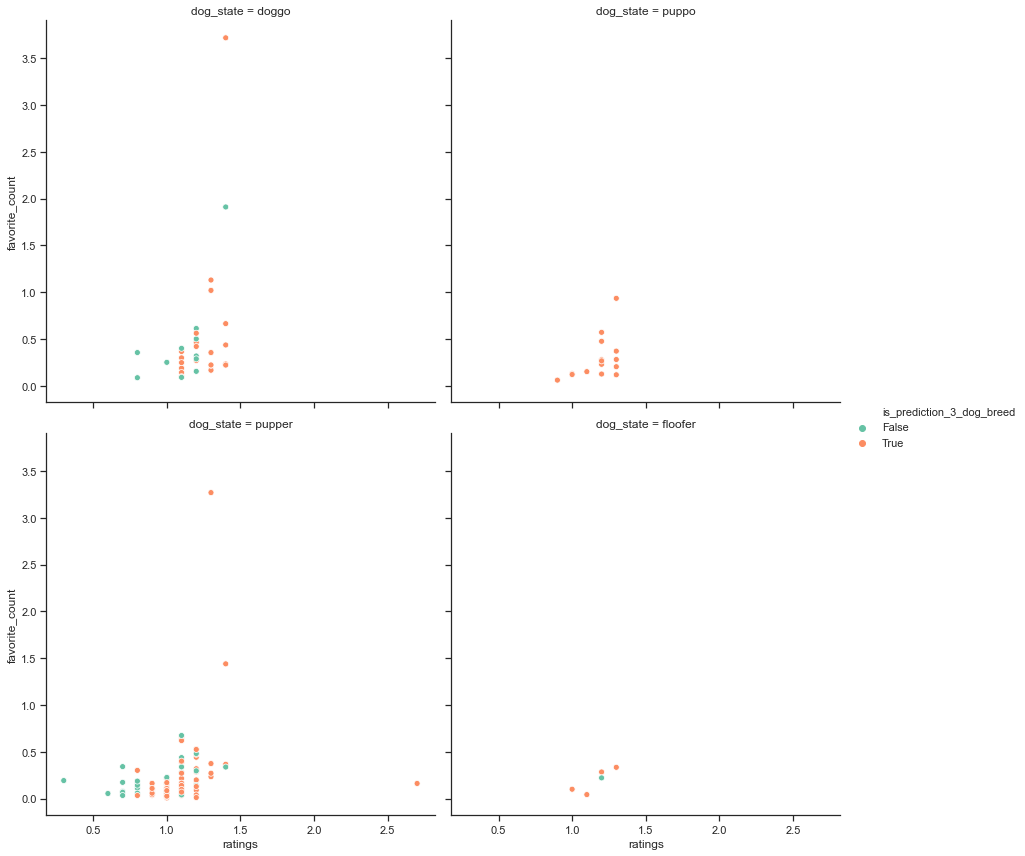

In [20]:
ax = sns.relplot(x="ratings", y="favorite_count", col="dog_state",
                     hue="is_prediction_3_dog_breed", 
                     palette="Set2", height=6, col_wrap=2, 
                     kind="scatter", data=df_tam_new)

> **Algorithm 3 & Favourite Count**
> * The accuracy in predicting floofer dogs is the lowest compared to other two algorithms.
> * Of all three algorithms, it has the highest precision in predicting puppo dogs

---
---
---

# Conclusion

> * Most of the time, all three algorithms used work exactly the same. However, algorithm #1 and #2 tends to have higher accuracy in predicting floofer dogs. In addition, using algorithm #3 can best predict puppo dogs.
> * The highest ratings and favourite count belongs to pupper dogs. On the other hand, doggo dogs won the highest retweet count.
> * There is a strong correlation between retweet count and favourite count, but ratings and retweet count as well as ratings and favourite count are weakly correlated.
>   * Compare the degree of correlation between retweet_count and favorite_count: 
>     * pupper > puppo > doggo 
>   * ratings of 1.4 has the highest favorite_count and retweet_count.
> * Most of ratings are in the range between 0.5 and 1.5. The ratings of pupper has the highest variance
> * No matter which algorithm used, dog states has an impact on predicting results 
> * **The number of dogs for each dog state are different. This shows the data is biased.** The bias in data may result in a biased data analysis.